In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns
plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,         
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
import glob
import os

import pandas as pd

In [3]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        df = pd.read_csv(file)

        # Check if the file contains multiple datasets (4 rows) or single dataset (2 rows)
        if len(df) == 4:
            # Handle special case with multiple datasets
            df["Dataset"] = df["Method"].apply(lambda x: x.split()[-1])
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        elif len(df) == 2:
            # Handle standard case
            dataset_name = df["Method"].iloc[0].split()[-1].replace("_dataset", "")
            df["Dataset"] = dataset_name
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        else:
            print(f"Warning: Unexpected number of rows ({len(df)}) in file: {file}")

        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)


def process_image_metrics_data(df):
    df = df[~df["Method"].isin(["Transformation", "Method"])]
    df = df.dropna().reset_index(drop=True)
    return df


def create_formatted_dataframe(df):
    metrics = ["NMSE", "PSNR", "SSI"]

    # Create MultiIndex columns
    column_tuples = [(metric, method) for metric in metrics for method in ["PCA", "POLCA"]]
    columns = pd.MultiIndex.from_tuples(column_tuples)

    # Create the new DataFrame
    formatted_data = []

    for dataset in df["Dataset"].unique():
        dataset_df = df[df["Dataset"] == dataset]
        new_row = {}
        for metric in metrics:
            pca_value = dataset_df[dataset_df["Method"] == "PCA"][metric].values[0]
            polca_value = dataset_df[dataset_df["Method"] == "POLCA"][metric].values[0]
            new_row[(metric, "PCA")] = pca_value
            new_row[(metric, "POLCA")] = polca_value
        formatted_data.append(new_row)

    formatted_df = pd.DataFrame(formatted_data, columns=columns)

    # Set index
    formatted_df.index = df["Dataset"].unique()
    formatted_df.index.name = "Dataset"

    return formatted_df

In [4]:
# Main execution
print("Starting main execution for image metrics")
raw_image_metrics = read_csv_files("experiments/*/image_metrics.csv")
image_metrics = process_image_metrics_data(raw_image_metrics)

print("\nProcessed DataFrame columns:")
print(image_metrics.columns)
print("\nFirst few rows of processed DataFrame:")
print(image_metrics.head())

formatted_df = create_formatted_dataframe(image_metrics)

print("\nFormatted DataFrame:")
formatted_df

Starting main execution for image metrics

Processed DataFrame columns:
Index(['Method', 'NMSE', 'PSNR', 'SSI', 'Dataset'], dtype='object')

First few rows of processed DataFrame:
  Method    NMSE     PSNR     SSI      Dataset
0  POLCA  0.1345  16.3166  0.3782  organcmnist
1    PCA  0.0856  17.7284  0.4379  organcmnist
2  POLCA  0.1405  16.2932  0.3556  organsmnist
3    PCA  0.0850  17.8907  0.4351  organsmnist
4  POLCA  0.0296  23.6909  0.5402    pathmnist

Formatted DataFrame:


NMSE             PSNR              SSI        
                PCA   POLCA      PCA    POLCA     PCA   POLCA
Dataset                                                      
organcmnist  0.0856  0.1345  17.7284  16.3166  0.4379  0.3782
organsmnist  0.0850  0.1405  17.8907  16.2932  0.4351  0.3556
pathmnist    0.0078  0.0296  26.3174  23.6909  0.6783  0.5402
Sinudoidal   0.1820  0.0047  20.8163  52.0112  0.8427  0.9999
Bent         0.3742  0.0042  13.6371  52.6723  0.4569  1.0000
breastmnist  0.0256  0.0632  24.8812  25.1330  0.7229  0.6217
bloodmnist   0.0045  0.0198  26.5022  20.8332  0.8621  0.6716
dermamnist   0.0011  0.0083  35.0645  28.1134  0.9384  0.7467
octmnist     0.0315  0.0114  27.1211  32.3945  0.8407  0.9323
retinamnist  0.0028  0.0185  36.2816  29.0716  0.9682  0.8556
fmnist       0.3109  0.2024  18.4598  22.9838  0.6065  0.7948

In [5]:
# Generate LaTeX table
latex_table = formatted_df.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Image Metrics Comparison",
    label="tab:image_metrics",
    position="htbp",
    float_format="%.4f",
    column_format="lrrrrrr",
)
print(latex_table)
with open("experiments/image_metrics_comparison.tex", "w") as f:
    f.write(latex_table)

\begin{table}[htbp]
\caption{Image Metrics Comparison}
\label{tab:image_metrics}
\begin{tabular}{lrrrrrr}
\toprule
 & \multicolumn{2}{r}{NMSE} & \multicolumn{2}{r}{PSNR} & \multicolumn{2}{r}{SSI} \\
 & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset &  &  &  &  &  &  \\
\midrule
organcmnist & 0.0856 & 0.1345 & 17.7284 & 16.3166 & 0.4379 & 0.3782 \\
organsmnist & 0.0850 & 0.1405 & 17.8907 & 16.2932 & 0.4351 & 0.3556 \\
pathmnist & 0.0078 & 0.0296 & 26.3174 & 23.6909 & 0.6783 & 0.5402 \\
Sinudoidal & 0.1820 & 0.0047 & 20.8163 & 52.0112 & 0.8427 & 0.9999 \\
Bent & 0.3742 & 0.0042 & 13.6371 & 52.6723 & 0.4569 & 1.0000 \\
breastmnist & 0.0256 & 0.0632 & 24.8812 & 25.1330 & 0.7229 & 0.6217 \\
bloodmnist & 0.0045 & 0.0198 & 26.5022 & 20.8332 & 0.8621 & 0.6716 \\
dermamnist & 0.0011 & 0.0083 & 35.0645 & 28.1134 & 0.9384 & 0.7467 \\
octmnist & 0.0315 & 0.0114 & 27.1211 & 32.3945 & 0.8407 & 0.9323 \\
retinamnist & 0.0028 & 0.0185 & 36.2816 & 29.0716 & 0.9682 & 0.8556 \\
fmnist & 0.3109 & 0.20

In [6]:
# Reshape the DataFrame
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_1": "Metric", "level_2": "Method", 0: "Value"})
)
df_long.head(6)

,Dataset,Metric,Method,Value
0,organcmnist,NMSE,PCA,0.0856
1,organcmnist,NMSE,POLCA,0.1345
2,organcmnist,PSNR,PCA,17.7284
3,organcmnist,PSNR,POLCA,16.3166
4,organcmnist,SSI,PCA,0.4379
5,organcmnist,SSI,POLCA,0.3782


In [7]:
def normalize_and_aggregate_results(df_long):
    """
    Normalize 'Value' within each Dataset, then aggregate by taking the mean across datasets.

    :param df_long: Pandas DataFrame with columns: Dataset, Classifier, Metric, Method, Value
    :return: Aggregated DataFrame with normalized mean values
    """     
    df = pd.DataFrame(df_long.copy())
    # Min-max normalization of PSNR values
    psnr_values = df[df['Metric'] == 'PSNR']['Value']
    psnr_min = psnr_values.min()
    psnr_max = psnr_values.max()
    
    # Applying min-max normalization
    df.loc[df['Metric'] == 'PSNR', 'Value'] = (psnr_values - psnr_min) / (psnr_max - psnr_min)
    # Calculate the mean of normalized values across datasets
    df_aggregated = df.groupby(["Metric", "Method"])["Value"].mean().reset_index()

    return df_aggregated

In [8]:
df_norm = normalize_and_aggregate_results(df_long)
df_norm

,Metric,Method,Value
0,NMSE,PCA,0.101000
1,NMSE,POLCA,0.057918
2,PSNR,PCA,0.267107
3,PSNR,POLCA,0.394762
4,SSI,PCA,0.708155
5,SSI,POLCA,0.717873


In [16]:
def create_metric_comparison_plots(df_aggregated, output_prefix="metric_comparison"):
    """
    Create separate bar plots for each metric, comparing PCA and POLCA methods across classifiers using pyplot.

    :param df_aggregated: Pandas DataFrame with columns: Classifier, Metric, Method, Normalized_Value
    :param output_prefix: Prefix for the output files
    """    
   
    # Filter data for the current metric
    metric_data = df_aggregated
    # Get unique classifiers and methods
    metrics = metric_data["Metric"].unique()
    methods = metric_data["Method"].unique()

    # Set up the plot
    fig, ax = plt.subplots(figsize=(4,4)) 
    

    # Set width of bars and positions
    bar_width = 0.5
    r1 = range(len(metrics))
    r2 = [x + bar_width for x in r1]
    # Use a grayscale colormap
    cmap = plt.get_cmap("Greys")
    colors = [cmap(0.5), cmap(0.0)]  # Darker gray for PCA, lighter gray for POLCA

    # Create bars
    for i, method in enumerate(methods):
        method_data = metric_data[metric_data["Method"] == method]
        positions = r1 if i == 0 else r2
        ax.bar(
            positions,
            method_data["Value"],
            width=bar_width,
            label=method,
            alpha=0.5,               
            facecolor=colors[i],
            edgecolor="k"
        )

    # Customize the plot
    ax.set_xlabel("")
    # ax.set_ylabel(f"Normalized values across datasets")
    ax.set_title(f"PCA and POLCA: Image Metrics")
    ax.set_xticks([r + bar_width / 2 for r in range(len(metrics))])
    metrics[list(metrics).index("SSI")]="SSIM"
    ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize="small")
    ax.set_ylim(0, 1.0)

    # Add legend
    ax.legend()

    # Add value labels on the bars
    for i, method in enumerate(methods):
        method_data = metric_data[metric_data["Method"] == method]
        positions = r1 if i == 0 else r2
        for j, value in enumerate(method_data["Value"]):
            ax.text(positions[j], value, f"{value:.2f}", ha="center", va="bottom", fontsize="small")

    # Adjust layout and save
    # plt.tight_layout()
    plt.savefig("experiments/image_metrics_comparison_plot.pdf", dpi=300, bbox_inches="tight")
    plt.plot()

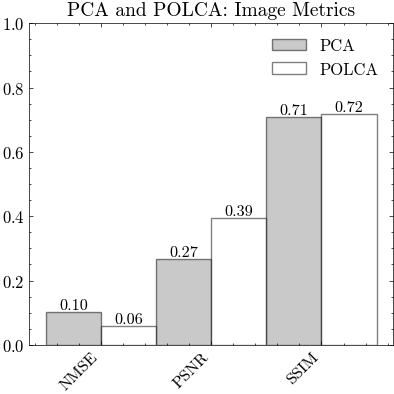

In [17]:
# plt.style.use('seaborn-v0_8-paper')
create_metric_comparison_plots(df_norm)